In [1]:
from importlib.metadata import version
import cv2
import pixellib
import urllib
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

# 1. Upload images and Set data

In [50]:
background_list = []
selfie_list = []
bird_list = []
background_path_list = []
selfie_path_list = []

background1_img_path = 'human_segmentation/images/background1.jpg'
background2_img_path = 'human_segmentation/images/background2.jpeg'
background_path_list.append(background1_img_path)
background_path_list.append(background2_img_path)

selfie1_img_path = 'human_segmentation/images/me1.jpeg'
selfie2_img_path = 'human_segmentation/images/me2.jpeg'
selfie3_img_path = 'human_segmentation/images/me3.jpeg'
selfie4_img_path = 'human_segmentation/images/me4.jpeg'
selfie5_img_path = 'human_segmentation/images/me5.jpeg'
selfie6_img_path = 'human_segmentation/images/me6.jpeg'
selfie7_img_path = 'human_segmentation/images/me7.jpeg'
selfie_path_list.append(selfie1_img_path)
selfie_path_list.append(selfie2_img_path)
selfie_path_list.append(selfie3_img_path)
selfie_path_list.append(selfie4_img_path)
selfie_path_list.append(selfie5_img_path)
selfie_path_list.append(selfie6_img_path)
selfie_path_list.append(selfie7_img_path)

bird_img_path = 'human_segmentation/images/bird.jpg'
background_path_list.append(bird_img_path)


background_list.append(cv2.imread(background1_img_path))
background_list.append(cv2.imread(background2_img_path))

selfie_list.append(cv2.imread(selfie1_img_path))
selfie_list.append(cv2.imread(selfie2_img_path))
selfie_list.append(cv2.imread(bird_img_path))

# 2. Upload model

In [3]:
# Upload model
model_file = 'human_segmentation/modelsdeeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation()

model.load_pascalvoc_model(model_file)

In [4]:
# Save pascalvoc labes
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
print("Number of labels: ",len(LABEL_NAMES))

Number of labels:  21


In [5]:
# Set Colormap
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

print("The Color map of the human on the above image :", colormap[15])
print("The Color map of the bird on the above image :", colormap[3])

The Color map of the human on the above image : [192 128 128]
The Color map of the bird on the above image : [128 128   0]


# 3. Create functions

## 3-1. Single Image function list
    - devide_image2Segments
    - check_segementsList
    - create_human_seg_mask
    - create_bird_seg_mask
    - make_humanimage_background_blur

In [6]:
def devide_image2Segments (img_path):
    segvalues, output = model.segmentAsPascalvoc(img_path)
    return segvalues, output

def check_segementsList(img_path):
    segvalues, output = devide_image2Segments(img_path)
    print("The list of segment on the image")
    for class_id in segvalues['class_ids']:
        print("  -",LABEL_NAMES[class_id])
    
def create_human_seg_mask (output):
    seg_color = (128,128,192)
    seg_map = np.all(output==seg_color, axis=-1)
    mask = seg_map.astype(np.uint8) * 255
    return mask

def create_bird_seg_mask (output):
    seg_color = (0,128,128)
    seg_map = np.all(output==seg_color, axis=-1)
    mask = seg_map.astype(np.uint8) * 255
    return mask

def make_humanimage_background_blur (img_path):
    segvalues, output = devide_image2Segments(img_path)
    is_human_detect = False
    for class_id in segvalues['class_ids']:
        if class_id == 15:
            is_human_detect = True  # Corrected capitalization
            break
    
    if not is_human_detect:
        print("No human detected")
        return None
    
    mask = create_human_seg_mask(output)
    img_show = cv2.imread(img_path)
    img_blur = cv2.blur(img_show, (100,100))
    mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    img_bg_mask = cv2.bitwise_not(mask_color)
    img_bg_blur = cv2.bitwise_and(img_blur, img_bg_mask)
    img_concat = np.where(mask_color==255, img_show, img_bg_blur)
    
    return img_concat

def make_birdimage_background_blur (img_path):
    segvalues, output = devide_image2Segments(img_path)
    is_bird_detect = False
    for class_id in segvalues['class_ids']:
        if class_id == 3:
            is_bird_detect = True  # Corrected capitalization
            break
    
    if not is_bird_detect:
        print("No bird detected")
        return None
    
    mask = create_bird_seg_mask(output)
    img_show = cv2.imread(img_path)
    img_blur = cv2.blur(img_show, (100,100))
    mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    img_bg_mask = cv2.bitwise_not(mask_color)
    img_bg_blur = cv2.bitwise_and(img_blur, img_bg_mask)
    img_concat = np.where(mask_color==255, img_show, img_bg_blur)
    
    return img_concat

## 3-2. Apply functions

In [7]:
selfie1_path = selfie_path_list[0]
selfie2_path = selfie_path_list[1]
check_segementsList(selfie1_path)
check_segementsList(selfie2_path)

bird_path = bird_img_path
check_segementsList(bird_path)

The list of segment on the image
  - background
  - person
The list of segment on the image
  - background
  - person
The list of segment on the image
  - background
  - bird


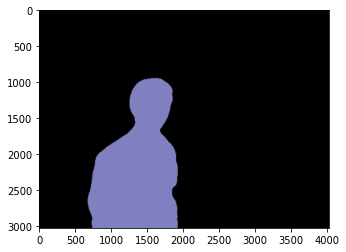

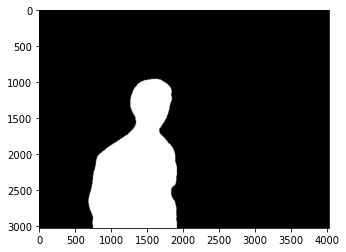

In [8]:
segvalues, output = devide_image2Segments(selfie2_img_path)
plt.imshow(output)
plt.show()
mask = create_human_seg_mask(output)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

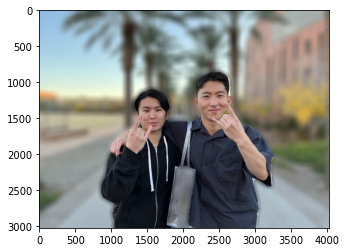

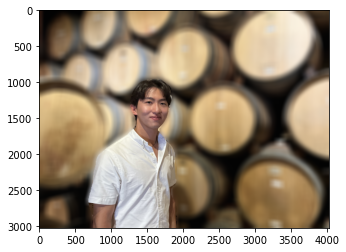

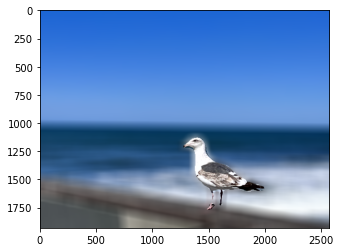

In [9]:
plt.imshow(cv2.cvtColor(make_humanimage_background_blur(selfie1_path), cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(make_humanimage_background_blur(selfie2_path), cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(make_birdimage_background_blur(bird_img_path), cv2.COLOR_BGR2RGB))
plt.show()

## 3-3. Chromakey related function list
    - modify_mask_size
    - create_chromarkey_for_bird
    - create_chromarkey_for_human

In [10]:
def modify_mask_size(bg_img, mask):
    x1, y1 = bg_img.shape[1], bg_img.shape[0]
    x2, y2 = mask.shape[1], mask.shape[0]
    if x1 < x2 or y1 < y2:
        return cv2.resize(mask, dsize=(x1, y1))
    else:
        return mask

def create_chromarkey_for_bird (background_img_path, seg_image_path):
    segvalues, output = devide_image2Segments(seg_image_path)
    is_bird_detect = False
    for class_id in segvalues['class_ids']:
        if class_id == 3:
            is_bird_detect = True  # Corrected capitalization
            break
    
    if not is_bird_detect:
        print("No bird detected")
        return None
    
    bg_img = cv2.imread(background_img_path)
    seg_img = cv2.imread(seg_image_path)
    mask = create_bird_seg_mask(output)
    mask_color = modify_mask_size(bg_img, cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR))
    
    
    # Make part for mask at background
    bg_img = np.where(mask_color==255, mask_color, bg_img)
    
    # Make mask-part colorful
    seg_img = modify_mask_size(bg_img, seg_img)
    img_seg_mask = cv2.bitwise_and(seg_img, mask_color)

    img_concat = np.where(bg_img==255, img_seg_mask, bg_img)
    
    return img_concat

def create_chromarkey_for_human (background_img_path, seg_image_path):
    segvalues, output = devide_image2Segments(seg_image_path)
    is_human_detect = False
    for class_id in segvalues['class_ids']:
        if class_id == 15:
            is_human_detect = True  # Corrected capitalization
            break
    
    if not is_human_detect:
        print("No human an detected")
        return None

    bg_img = cv2.imread(background_img_path)
    seg_img = cv2.imread(seg_image_path)
    mask = create_human_seg_mask(output)
    mask_color = modify_mask_size(bg_img, cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR))
    
    
    # Make part for mask at background
    bg_img = np.where(mask_color==255, mask_color, bg_img)
    
    # Make mask-part colorful
    seg_img = modify_mask_size(bg_img, seg_img)
    img_seg_mask = cv2.bitwise_and(seg_img, mask_color)
    img_concat = np.where(bg_img==255, img_seg_mask, bg_img)
    
    return img_concat

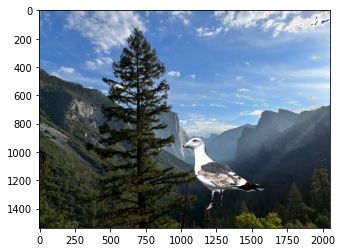

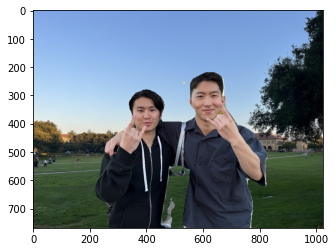

In [11]:
img_concat = create_chromarkey_for_bird(background1_img_path, bird_img_path)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

img_concat1 = create_chromarkey_for_human(background2_img_path, selfie1_img_path)
plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
plt.show()

# 3-3. Why are the below images being rotated?

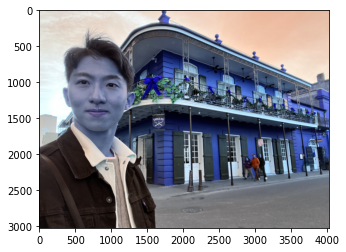

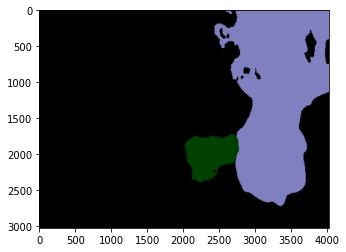

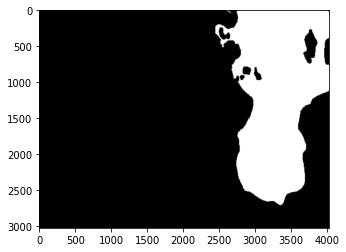

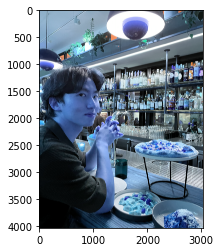

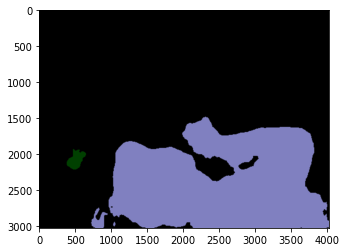

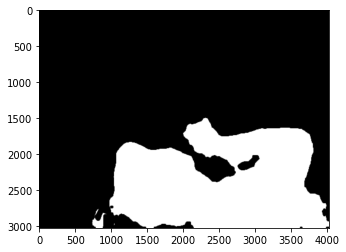

In [25]:
selfie2_img_path = 'human_segmentation/images/me2.jpeg'
selfie3_img_path = 'human_segmentation/images/me3.jpeg'

plt.imshow(cv2.imread(selfie2_img_path))
plt.show()
segvalues, output = devide_image2Segments(selfie2_img_path)
plt.imshow(output)
plt.show()
mask = create_human_seg_mask(output)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.imread(selfie3_img_path))
plt.show()
segvalues, output = devide_image2Segments(selfie3_img_path)
plt.imshow(output)
plt.show()
mask = create_human_seg_mask(output)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

## 3-4. Let's check the EXIF meta data
- What is Meta data?
EXIF (Exchangeable Image File Format) metadata is a standardized format for storing metadata in image files, especially in JPEG and TIFF files created by digital cameras and other image-capturing devices.  
  
- Check the rotation attribute on the EXIF  
1 = Horizontal (normal)  
2 = Mirror horizontal  
3 = Rotate 180  
4 = Mirror vertical  
5 = Mirror horizontal and rotate 270 CW  
6 = Rotate 90 CW  
7 = Mirror horizontal and rotate 90 CW  
8 = Rotate 270 CW  

In [24]:
from PIL import Image
from PIL import ExifTags
import piexif
img = Image.open(selfie2_img_path)

if "exif" in img.info:
    exif_dict = piexif.load(img.info["exif"])
    if piexif.ImageIFD.Orientation in exif_dict["0th"]:
        orientation = exif_dict["0th"].pop(piexif.ImageIFD.Orientation)
        exif_bytes = piexif.dump(exif_dict)
        print('{} orientation value is {}'.format(selfie2_img_path,str(orientation)))
        
img = Image.open(selfie1_img_path)

if "exif" in img.info:
    exif_dict = piexif.load(img.info["exif"])
    if piexif.ImageIFD.Orientation in exif_dict["0th"]:
        orientation = exif_dict["0th"].pop(piexif.ImageIFD.Orientation)
        exif_bytes = piexif.dump(exif_dict)
        print('{} orientation value is {}'.format(selfie1_img_path,str(orientation)))

human_segmentation/images/me2.jpeg orientation value is 3
human_segmentation/images/me1.jpeg orientation value is 1


## 3-5. Let's rotate it based on EXIF data

In [51]:
def check_rotation_attribute ():
    for path in selfie_path_list:
        img = Image.open(path)

        if "exif" in img.info:
            exif_dict = piexif.load(img.info["exif"])

            if piexif.ImageIFD.Orientation in exif_dict["0th"]:
                orientation = exif_dict["0th"].pop(piexif.ImageIFD.Orientation)
                exif_bytes = piexif.dump(exif_dict)
                print('{} orientation value is {}'.format(path, str(orientation)))

def get_rotation_attribute ():
    temp_list = []
    for path in selfie_path_list:
        img = Image.open(path)

        if "exif" in img.info:
            exif_dict = piexif.load(img.info["exif"])

            if piexif.ImageIFD.Orientation in exif_dict["0th"]:
                orientation = exif_dict["0th"].pop(piexif.ImageIFD.Orientation)
                exif_bytes = piexif.dump(exif_dict)
                temp_list.append(str(orientation))
    return temp_list

rotate_attr = get_rotation_attribute()
check_rotation_attribute()
print(rotate_attr)

human_segmentation/images/me1.jpeg orientation value is 1
human_segmentation/images/me2.jpeg orientation value is 3
human_segmentation/images/me3.jpeg orientation value is 6
human_segmentation/images/me4.jpeg orientation value is 6
human_segmentation/images/me5.jpeg orientation value is 6
human_segmentation/images/me6.jpeg orientation value is 1
human_segmentation/images/me7.jpeg orientation value is 1
['1', '3', '6', '6', '6', '1', '1']


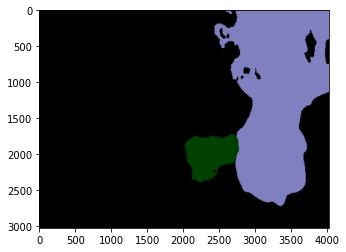

(3024, 4032, 3)
<class 'numpy.ndarray'>


In [54]:
segvalues, output = devide_image2Segments(selfie2_img_path)
plt.imshow(output)
plt.show()

print(output.shape)
print(type(output))

In [60]:
def devide_image2Segments (img_path):
    orientation = 1
    
    img = Image.open(img_path)

    if "exif" in img.info:
        exif_dict = piexif.load(img.info["exif"])

        if piexif.ImageIFD.Orientation in exif_dict["0th"]:
            orientation = exif_dict["0th"].pop(piexif.ImageIFD.Orientation)
            exif_bytes = piexif.dump(exif_dict)
            orientation = str(orientation)
    segvalues, output = model.segmentAsPascalvoc(img_path)
    
    if orientation != 1:
        if orientation == '3':
            output = np.rot90(output, 2)
        elif orientation == '6':
            output = np.rot90(output, -1)
    
    return segvalues, output

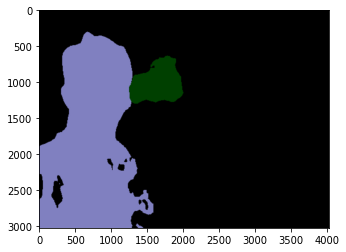

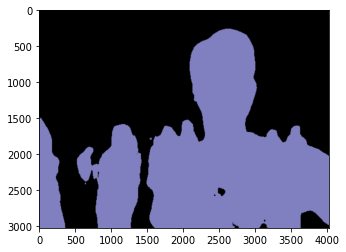

In [63]:
segvalues, output = devide_image2Segments(selfie2_img_path)
plt.imshow(output)
plt.show()

segvalues, output = devide_image2Segments(selfie6_img_path)
plt.imshow(output)
plt.show()

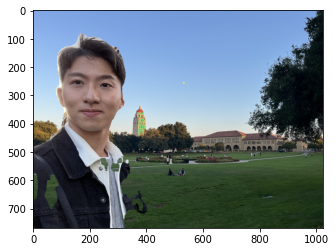

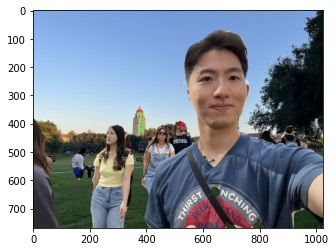

In [64]:
img_concat1 = create_chromarkey_for_human(background2_img_path, selfie2_img_path)
plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
plt.show()

img_concat1 = create_chromarkey_for_human(background2_img_path, selfie6_img_path)
plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
plt.show()

# 4. Evaluate model
## Not accurate model
![img](human_segmentation/images/problem1.png)  
The detected part that model think as human is not a human.  
Also it seems like the boundary between the human's hair and the background in the images is not well-defined.  
The reason is that the hair appears to have been cut with unnatural curves.  

The similar problem occured in the "practice9 file".  
![img](human_segmentation/images/problem2.png)  
You can check the above photo on that file, and on this photo, you can see the earphone line on the human detection part. It seems the model can't detect and cut the part precisely if some stuffs are attached to the human body.  

# 5. How to solve those problems